## 1. Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing data

In [4]:
newspaper_data = pd.read_csv('NewspaperData.csv')
newspaper_data.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


## 3. Data Understanding

In [6]:
newspaper_data.shape

(34, 3)

In [7]:
newspaper_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

In [8]:
newspaper_data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [9]:
newspaper_data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [28]:
newspaper_data =newspaper_data.drop(['Newspaper'] , axis=1)

In [30]:
newspaper_data.median()

daily     355.2355
sunday    436.7125
dtype: float64

## 4. Assumptions check

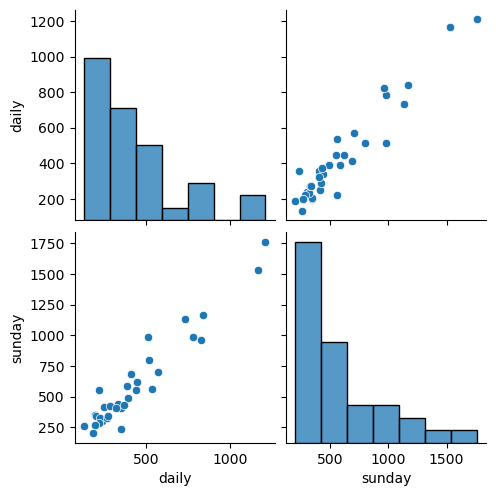

In [32]:
sns.pairplot(data=newspaper_data)

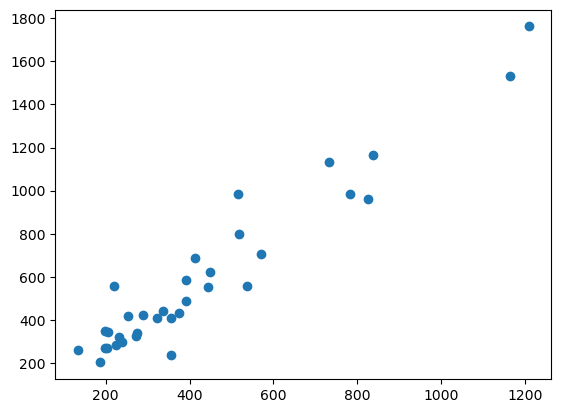

In [34]:
plt.scatter(x = 'daily',y = 'sunday', data = newspaper_data)

In [36]:
newspaper_data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


## 5. Model Building and Model Training

Linear regression can be build using 2 libraries:

* statsmodels
* sklearn

In [42]:
import statsmodels.formula.api as sfa

In [44]:
#Building linear regression using ordinary least square technique
#linear_model = sfa.ols('Y~X',data).fit()
linear_model = sfa.ols('sunday~daily',data = newspaper_data).fit() # .fit()-to find intercept and Slope

In [50]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

## 6. Model Testing

In [ ]:
new_data = pd.read_csv('newspaper_test_data.csv')
new_data

##### 6.1 Manual calculation

In [1]:
 1.339715*(200) + 13.835630

281.77862999999996

y = mx + c


  = 1.339715(400) + 13.835630

(1.339715 * 350) + 13.835630

#For 200 - 281
#For 400 - 549
#For 350 - 482

##### 6.2 Machine Prediction

In [ ]:
train_data = newspaper_data[['daily']]
train_data

In [ ]:
linear_model.predict(train_data)  #data-provided manually for prediction

In [ ]:
linear_model.predict(new_data)   #data provided using csv for prediction


In [ ]:
nw_data = pd.DataFrame({ 'daily': [400,300,100,350]})
nw_data

In [ ]:
linear_model.predict(nw_data)

In [ ]:
sns.regplot(x = 'daily', y = 'sunday', data = newspaper_data)

In [ ]:
sns.set_theme(style='darkgrid',palette='rainbow')

In [ ]:
sns.regplot(x = 'daily', y = 'sunday', data = newspaper_data)

## 7. Model Evaluation

In [ ]:
linear_model.aic,linear_model.rsquared

## 8. Model deployement

In [ ]:
from pickle import dump

In [ ]:
dump(linear_model,open('linear_model.pkl','wb')) #Serialzation

In [ ]:
from pickle import load

In [ ]:
loaded_model = load(open('linear_model.pkl','rb')) #Deserialzation

In [ ]:
loaded_model.predict(new_data)

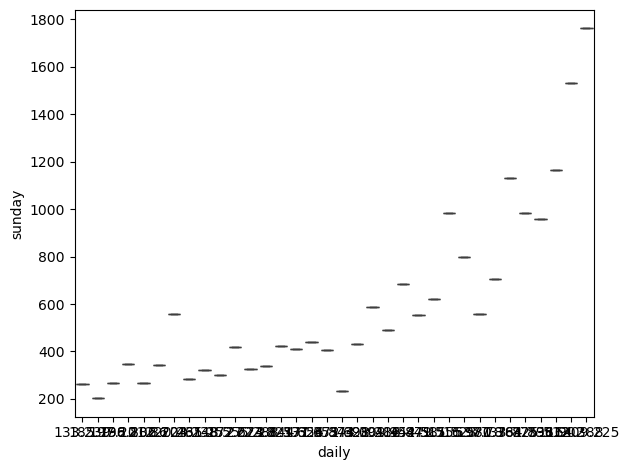

In [68]:
sns.boxplot(x='daily', y='sunday', data=newspaper_data)

# Display the plot
plt.tight_layout()
plt.show()
